In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# データ生成 --------------------------------
np.random.seed(seed=1) # 乱数生成

N = 200
K = 3
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))

X_range0 = [-3, 3]  # X0 の範囲, 表示用
X_range1 = [-3, 3]  # X1 の範囲, 表示用

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])    # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布の分散
Pi = np.array([0.4, 0.8, 1])    # 各分布への割合

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k].item() + Mu[T[n, :] == 1, k].item()

In [8]:
# 2分類のデータをテスト・訓練データに分割-------------------------
TrainingRatio = 0.5

X_n_training = int(N * TrainingRatio)
X_train = X[:X_n_training, :]
X_test = X[:X_n_training, :]
T_train = T[:X_n_training, :]
T_test = T[:X_n_training, :]

# データを 'class_data.npz' に保存------------------------------
np.savez('class_data.npz',  X_train=X_train, T_train=T_train, 
                            X_test=X_test, T_test=T_test,
                            X_range0=X_range0, X_range1=X_range1)

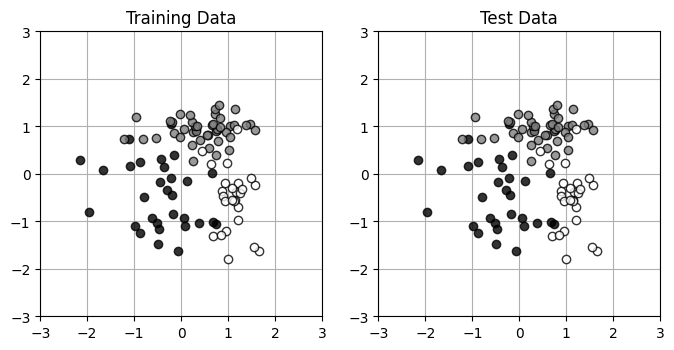

In [9]:
# データの図示 --------------------------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

# メイン --------------------------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)

plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)

plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()